# Insurance claim regression problem

                                                                                                    (Reg Id: 2003258)

In [341]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

### Loading the data from CE802_P3_Data

In [342]:
#Read P3 data
data = pd.read_csv('C:\PC\ML_Project\CE802_P3_Data\CE802_P3_Data.csv')
test = pd.read_csv('C:\PC\ML_Project\CE802_P3_Data\CE802_P3_Test.csv')

In [343]:
test_org = test.copy()

### Pre-processing

In [344]:
data['F4'].unique()

array(['UK', 'Europe', 'USA', 'Rest'], dtype=object)

  Here, Feature F4 has taken 4 unique values, since there is no order or rank among values. And no of unique values are also     minimal, in situations like this , one hot encodeing is preferred

In [345]:
#one hot encoding F4 (countries)
encoder=OneHotEncoder(sparse=False)
encoder.fit(data[['F4']])
data_encoded = pd.DataFrame(encoder.transform(data[['F4']]))
data_encoded.columns = encoder.get_feature_names(['F4'])
data.drop(['F4'],axis =1,inplace=True)
#encoder.get_feature_names(['F4'])
data = pd.concat([data,data_encoded], axis=1 )

#encoding for test set 
test_encoded = pd.DataFrame(encoder.transform(test[['F4']]))
test_encoded.columns = encoder.get_feature_names(['F4'])
test.drop(['F4'],axis =1,inplace=True)
test = pd.concat([test,test_encoded], axis=1 )


In [346]:
data['F15'].unique()

array(['Very high', 'Very low', 'Low', 'Medium', 'High'], dtype=object)

As Can be seen above, feature 'F15' is a catogorical feature with 5 diffrent unique values. It can also be observed, there 
is order among them,so,it makes them ordinal categorical feature.
Ordinal encoding is used on feature 'F15'

In [347]:
seq = ['Very low','Low','Medium','High','Very high']
oe = OrdinalEncoder(categories=[seq])
oe.fit(data[['F15']])
data['F15'] = pd.DataFrame(oe.transform(data[['F15']]))

test['F15'] = pd.DataFrame(oe.transform(test[['F15']]))

### Data Splitting 

In [348]:
data_y = data[['Target']]
data_X = data.drop(columns=['Target'],axis=1)

In [349]:
# Data is split into 70:30 ratio 
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30,random_state=42)

Here,we need to first predict , if insured would make a claim , and then if he deos , how much ?.
We can devide problem into two parts classification part and regression part.
Inorder to have training data for both the problem, we devide data in two ways.
One dataset with boolean target variable for classification problem and other with target variable with amount
claimed by insured for regression part.

In [350]:
#this dataset would have a training examples where insurance is claimed,this is used to tarin regression part 
# of the problem statement 
X_train_claimed = X_train[y_train['Target'] > 0.0]
y_train_claimed = y_train[y_train['Target'] > 0.0]
X_test_claimed = X_test[y_test['Target'] > 0.0]
y_test_claimed = y_test[y_test['Target'] > 0.0]

In [351]:
#this can be used as a target variable for classification part of the problme.
# the value would be 1 if insurance is cliamed ,0 otherwise 
y_train_isClaimed = (y_train['Target'] > 0.0).astype(int)
y_test_isCliamed = (y_test['Target'] > 0.0).astype(int)

### Feature Scaling 

In [352]:
# Features are normalised using minmax scaler 
sca = MinMaxScaler()
sca.fit(X_train)
X_train_sca = sca.transform(X_train)
X_test_sca = sca.transform(X_test)

# scaling regression probelem data set
sca1= MinMaxScaler()
sca1.fit(X_train_claimed)
X_train_claimed_sca = sca.transform(X_train_claimed)
X_test_claimed_sca = sca.transform(X_test_claimed)


### Model Selection

##### Classifier model analysis

Firstly,we will select best classifier for our problem camparing various classifiers 

###### Logistic Regression

In [353]:
lg = LogisticRegression(max_iter=1000);
cv_score_lg = cross_val_score(lg,X_train_sca, y_train_isClaimed,cv=10)

lg.fit(X_train_sca,y_train_isClaimed);
y_pred_lg = lg.predict(X_test_sca)
acc_score_lg = accuracy_score(y_test_isCliamed,y_pred_lg,normalize= True)* 100.0

print('\033[1m' + 'Logistic Regression\n ' + '\033[0m')
print('Cross validation accuracy: ' + str(cv_score_lg.mean()* 100.0))
print('Test set accuracy:         '+  str(accuracy_score(y_test_isCliamed,y_pred_lg,normalize= True)* 100.0))

Logistic Regression
 
Cross validation accuracy: 93.61904761904762
Test set accuracy:         93.77777777777779


###### SVM

In [354]:
from sklearn import svm

svmc = svm.SVC(kernel='linear')
cv_score_svm = cross_val_score(svmc,X_train_sca, y_train_isClaimed,cv=10)

svmc.fit(X_train_sca,y_train_isClaimed);
y_pred_svm = svmc.predict(X_test_sca)
acc_score_svm = accuracy_score(y_test_isCliamed,y_pred_svm,normalize= True)* 100.0

print('\033[1m' + 'SVM\n ' + '\033[0m')
print('Cross validation accuracy: ' + str(cv_score_svm.mean()* 100.0))
print('Test set accuracy:         '+  str(accuracy_score(y_test_isCliamed,y_pred_svm,normalize= True)* 100.0))

SVM
 
Cross validation accuracy: 96.28571428571429
Test set accuracy:         95.55555555555556


In [355]:
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
cv_score_rf = cross_val_score(rf,X_train, y_train_isClaimed,cv=10)
rf.fit(X_train,y_train_isClaimed);
y_pred_rf = rf.predict(X_test)
acc_score_rf = accuracy_score(y_test_isCliamed,y_pred_rf,normalize= True)* 100.0

print('\033[1m' + 'RandomForest Classifier\n ' + '\033[0m')
print('Cross validation accuracy: ' + str(cv_score_rf.mean()* 100.0))
print('Test set accuracy:         '+  str(accuracy_score(y_test_isCliamed,y_pred_rf,normalize= True)* 100.0))

RandomForest Classifier
 
Cross validation accuracy: 86.1904761904762
Test set accuracy:         85.77777777777777


In [356]:
gbc = GradientBoostingClassifier(n_estimators=180, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train, y_train_isClaimed)
cv_score_gb = cross_val_score(gbc,X_train, y_train_isClaimed,cv=10)
y_pred_gbc = gbc.predict(X_test)
acc_score_gbc = accuracy_score(y_test_isCliamed,y_pred_gbc,normalize= True)* 100.0
print('\033[1m' + 'GradientBoosting Classifier\n ' + '\033[0m')
print('Cross validation accuracy: ' + str(cv_score_gb.mean() * 100.0))
print('Test set accuracy:         '+  str(accuracy_score(y_test_isCliamed,y_pred_gbc,normalize= True)* 100.0))

GradientBoosting Classifier
 
Cross validation accuracy: 94.0952380952381
Test set accuracy:         92.66666666666666


### Classifiers Performance plot

Here, Various alogorithms performance is ploted and displayed in a tabular form 

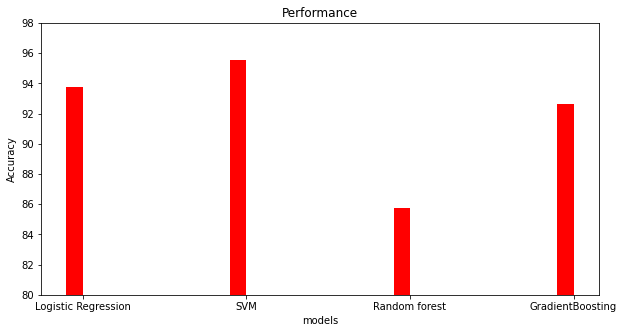

In [357]:
import matplotlib.pyplot as plt
import numpy as np

acc_score =[acc_score_lg, acc_score_svm, acc_score_rf, acc_score_gbc]


N=4
X = np.arange(N)
width = 0.10
plt.bar(X, acc_score, width, color='r')
plt.xticks(X + width / 2, ('Logistic Regression', 'SVM','Random forest','GradientBoosting'))

plt.ylabel('Accuracy')
plt.xlabel('models')
plt.title('Performance')
plt.ylim([80,98])
plt.rcParams["figure.figsize"] = (14,5)

plt.show()

In [372]:
print('                           '+ '  Logistic Regression       '+'    SVM          '+ '   Random forest'+
      '        GradientBoosting\n')
print('Cross validation accuracy:   ' + str(cv_score_lg.mean() * 100.0)+'      '+str(cv_score_svm.mean() * 100.0)+'      '+ 
str(cv_score_rf.mean() * 100.0)+ '     '+str(cv_score_gb.mean() * 100.0))
print('Test set accuracy        :   '+  str(acc_score_lg) + '      ' +str(acc_score_svm) + '      '+str(acc_score_rf)+
      '     '+ str(acc_score_gbc))

                             Logistic Regression           SVM             Random forest        GradientBoosting

Cross validation accuracy:   93.61904761904762      -1.108369021883805      86.1904761904762     81.3213895765909
Test set accuracy        :   93.77777777777779      95.55555555555556      85.77777777777777     92.66666666666666


##### Regression model analysis

Using the dataset for regression problem,lets analyse which regression algorithm would be best suited for our problem 

###### Linear Regression

In [359]:
X_train_claimed_sca.shape

(743, 19)

In [360]:
lin_reg = LinearRegression()
cv_score_lin = cross_val_score(lin_reg,X_train_claimed_sca, y_train_claimed,cv=10,scoring='r2')
lin_reg.fit(X_train_claimed_sca,y_train_claimed)
y_test_pred_lin= lin_reg.predict(X_test_claimed_sca)
r2_score_lin = r2_score(y_test_claimed,y_test_pred_lin)
print('\033[1m' + 'LinearRegression\n ' + '\033[0m')
print('Cross validation R2 score: ' + str(cv_score_lin.mean()))
print('Test set R2 score :         '+  str(r2_score(y_test_claimed,y_test_pred_lin)))
print('Test set root mean square erorr score : '+  str(mean_squared_error(y_test_claimed,y_test_pred_lin) ** 0.5))


LinearRegression
 
Cross validation R2 score: 0.8535207251078953
Test set R2 score :         0.8574177548224118
Test set root mean square erorr score : 409.81509889921205


###### KNN

In [361]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
cv_score_knn = cross_val_score(knn_reg,X_train_claimed_sca, y_train_claimed,cv=10,scoring='r2')
knn_reg.fit(X_train_claimed_sca,y_train_claimed)
y_test_pred_knn = knn_reg.predict(X_test_claimed_sca)
r2_score_knn = r2_score(y_test_claimed,y_test_pred_knn)
print('\033[1m' + 'KNeighborsRegressor\n ' + '\033[0m')
print('Cross validation R2 score: ' + str(cv_score_knn.mean()))
print('Test set R2 score :         '+  str(r2_score(y_test_claimed,y_test_pred_knn)))
print('Test set root mean square erorr score : '+  str(mean_squared_error(y_test_claimed,y_test_pred_knn) ** 0.5))


KNeighborsRegressor
 
Cross validation R2 score: 0.48363385227363703
Test set R2 score :         0.5701058847735825
Test set root mean square erorr score : 711.6000676480139


###### SVM 

In [362]:
from sklearn import svm

lin_svm = svm.SVR(kernel='linear')
cv_score_svm = cross_val_score(lin_svm,X_train_claimed_sca, y_train_claimed.to_numpy().flatten(),cv=10,scoring='r2')
lin_svm.fit(X_train_claimed_sca,y_train_claimed.to_numpy().flatten())
y_test_pred_svm = lin_svm.predict(X_test_claimed_sca)
r2_score_svm = r2_score(y_test_claimed,y_test_pred_svm)

print('\033[1m' + 'SVR\n ' + '\033[0m')
print('Cross validation R2 score: ' + str(cv_score_svm.mean()))
print('Test set R2 score :         '+  str(r2_score(y_test_claimed,y_test_pred_svm)))
print('Test set root mean square erorr score : '+  str(mean_squared_error(y_test_claimed,y_test_pred_svm) ** 0.5))


SVR
 
Cross validation R2 score: -0.011083690218838049
Test set R2 score :         0.042268154006051994
Test set root mean square erorr score : 1062.1288241416466


###### Gradient Boosting 

In [363]:
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=300,min_samples_split=4,max_depth=2,learning_rate=0.1)
cv_score_gb = cross_val_score(gb_reg,X_train_claimed, y_train_claimed.to_numpy().flatten(),cv=10,scoring='r2')
gb_reg.fit(X_train_claimed,y_train_claimed.to_numpy().flatten())
y_test_pred_gb = gb_reg.predict(X_test_claimed)
r2_score_gb = r2_score(y_test_claimed,y_test_pred_gb)

print('\033[1m' + 'GradientBoostingRegressor\n ' + '\033[0m')
print('Cross validation R2 score: ' + str(cv_score_gb.mean()))
print('Test set R2 score :         '+  str(r2_score(y_test_claimed,y_test_pred_gb)))
print('Test set root mean square erorr score : '+  str(mean_squared_error(y_test_claimed,y_test_pred_gb) ** 0.5))


GradientBoostingRegressor
 
Cross validation R2 score: 0.813213895765909
Test set R2 score :         0.8357253434756058
Test set root mean square erorr score : 439.8863791962097


##### Decision Tree

In [364]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth= 25)
cv_score_dt = cross_val_score(dt_reg,X_train_claimed, y_train_claimed,cv=10,scoring='r2')
dt_reg.fit(X_train_claimed,y_train_claimed)
y_test_pred_dt = dt_reg.predict(X_test_claimed)
r2_score_dt = r2_score(y_test_claimed,y_test_pred_dt)

print('\033[1m' + 'DecisionTreeRegressor\n ' + '\033[0m')
print('Cross validation R2 score: ' + str(cv_score_dt.mean()))
print('Test set R2 score :         '+  str(r2_score(y_test_claimed,y_test_pred_dt)))
print('Test set root mean square erorr score : '+  str(mean_squared_error(y_test_claimed,y_test_pred_dt) ** 0.5))


DecisionTreeRegressor
 
Cross validation R2 score: 0.2102722109366189
Test set R2 score :         0.32311817552050337
Test set root mean square erorr score : 892.9181626632258


### Regression models perfomace plot

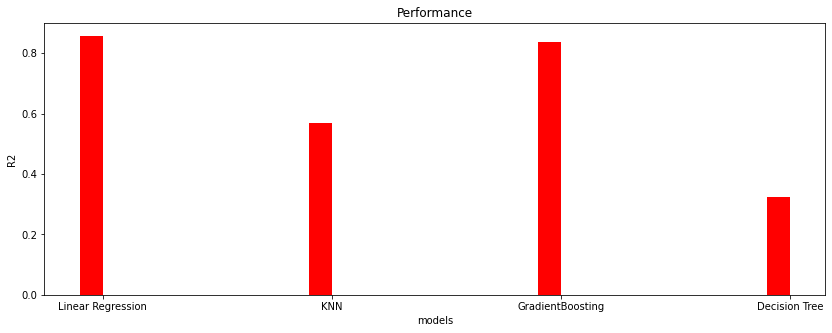

In [365]:
acc_score =[r2_score_lin, r2_score_knn, r2_score_gb, r2_score_dt]


N=4
X = np.arange(N)
width = 0.10
plt.bar(X, acc_score, width, color='r')
plt.xticks(X + width / 2, ('Linear Regression', 'KNN','GradientBoosting','Decision Tree'))

plt.ylabel('R2')
plt.xlabel('models')
plt.title('Performance')
#plt.ylim([,98])
plt.rcParams["figure.figsize"] = (10,5)

plt.show()

In [376]:
print('                         '+ 'Linear Regression       '+'    KNN          '+ '   GradientBoosting'+
      '          Decision Tree\n')
print('Test set R2 score  :     ' + str(r2_score_lin)+'     '+str(r2_score_knn)+'     '+ 
str(r2_score_gb)+ '     '+str(r2_score_dt))
print('Test set RMSE error:     '+  str(mean_squared_error(y_test_claimed,y_test_pred_lin) ** 0.5) + 
      '     ' +str(mean_squared_error(y_test_claimed,y_test_pred_knn) ** 0.5) + '      '+
      str(mean_squared_error(y_test_claimed,y_test_pred_gb) ** 0.5)+
      '      '+ str(mean_squared_error(y_test_claimed,y_test_pred_dt) ** 0.5))

                         Linear Regression           KNN             GradientBoosting          Decision Tree

Test set R2 score  :     0.8574177548224118     0.5701058847735825     0.8357253434756058     0.32311817552050337
Test set RMSE error:     409.81509889921205     711.6000676480139      439.8863791962097      892.9181626632258


### Test Set Prediction

As can be seen from the above model analysis, SVM is best suited for classification while linear regression is doing well 
to predict the insuranace claimed value.


In [367]:
test_y = test[['Target']]
test_X = test.drop(columns=['Target'],axis=1)

test_X_sca= sca.transform(test_X)

In [368]:

is_claimed = svmc.predict(test_X_sca)
Claim_value = lin_reg.predict(test_X_sca)
test_org['is_claimed'] = is_claimed
test_org['Claim_value'] = Claim_value

In [ ]:
test_org['Target'] = test_org.apply(lambda x: x['is_claimed'] if x['is_claimed'] == 0 else abs(x['Claim_value']), axis=1)
test_org.drop(columns=['is_claimed','Claim_value'],axis=1,inplace=True)
